# Regresi Linier Sederhana menggunakan library sklearn

Penjelasan dapat dilihat pada https://medium.com/@mirdhasuciananda/regresi-linier-dengan-python-menggunakan-library-sklearn-3ce89b7f801c

In [1]:
# import library dan modul
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import math

In [2]:
# load dataset Dataapartements
df = pd.read_csv('Dataapartments.csv')

# menampilkan dataset
df.head()

,price,distance_to_city_center,rooms,size
0,191.565,2.4,1,19.35
1,221.568,2.4,2,13.08
2,185.936,5.0,1,24.66
3,275.502,1.9,1,24.82
4,241.205,1.9,1,25.39


In [3]:
# melihat informasi mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    76 non-null     float64
 1   distance_to_city_center  76 non-null     float64
 2   rooms                    76 non-null     int64  
 3   size                     76 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.5 KB


In [4]:
# melihat statistik data
df.describe()

,price,distance_to_city_center,rooms,size
count,76.000000,76.000000,76.000000,76.000000
mean,356.867974,5.106579,2.644737,48.138684
std,157.198524,2.295639,1.261787,22.009502
min,151.757000,1.400000,1.000000,13.080000
25%,235.533750,3.000000,2.000000,30.600000
50%,298.442500,5.050000,2.500000,41.280000
75%,433.078500,6.800000,3.250000,58.162500
max,808.144000,11.300000,5.000000,106.960000


In [5]:
# menghitung korelasi
df.corr()

,price,distance_to_city_center,rooms,size
price,1.000000,-0.197061,0.883011,0.928697
distance_to_city_center,-0.197061,1.000000,0.024754,0.096394
rooms,0.883011,0.024754,1.000000,0.943043
size,0.928697,0.096394,0.943043,1.000000


Text(0.5, 1.0, 'Korelasi antar variabel')

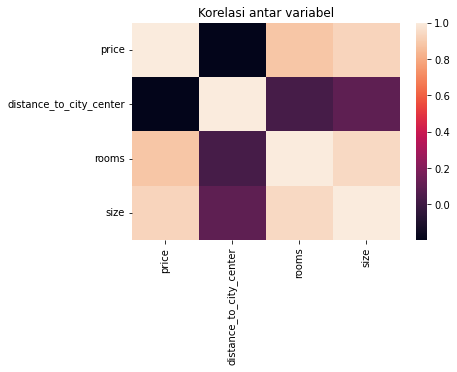

In [6]:
# melihat korelasi dengan visualisasi heatmap
sns.heatmap(df.corr(), annot=False, fmt="f").set_title("Korelasi antar variabel")

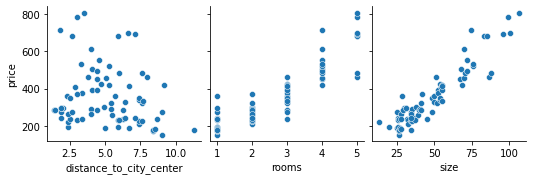

In [7]:
# visualisasi menggunakan scatter plot
sns.pairplot(df, x_vars=['distance_to_city_center', 'rooms', 'size'], y_vars='price')

In [8]:
x = df['size'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [9]:
# split data train data test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)

In [10]:
# membuat object variabel linier regresi
regressor = linear_model.LinearRegression()

In [11]:
# training model menggunakan training data
regressor.fit(X_train,y_train)

LinearRegression()

In [12]:
# mencari koefisien regresi dalam hal ini adalah koefisien/slope(b1) dan intercept(b0)
print('slope =', regressor.intercept_)
print('intercept =', regressor.coef_)

slope = [34.54169871]
intercept = [[6.83528022]]


In [13]:
# mencari skor akurasi dari meodel menggunakan testing data
regressor.score(X_test,y_test)

0.8837376449630483

In [14]:
# menghitung korelasi testing data
math.sqrt(regressor.score(X_test,y_test))

0.9400732125547714

Text(0.5, 1.0, 'plot perbandingan hasil prediksi dan data asli')

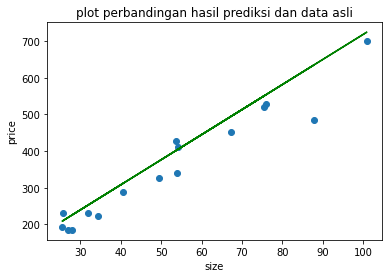

In [15]:
# visualisasi hasil regresi linier
y_prediksi = regressor.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test,y_prediksi, c='g')
plt.xlabel('size')
plt.ylabel('price')
plt.title('plot perbandingan hasil prediksi dan data asli')

In [16]:
# menampilkan tabel berisi data test dan data train
np_table = np.concatenate((X_test,y_test,y_prediksi), axis=1)
df_baru = pd.DataFrame(data=np_table, columns=['x_test','y_test','y_predict'])
df_baru

,x_test,y_test,y_predict
0,25.54,193.052,209.114756
1,100.88,700.000,724.084768
2,53.61,427.023,400.981072
3,54.18,409.836,404.877181
4,75.59,521.571,551.220531
5,67.35,451.245,494.897822
6,75.92,529.753,553.476173
7,53.83,339.129,402.484833
8,32.02,232.113,253.407371
9,26.87,185.967,218.205678


In [17]:
# menghitung nilai mape
mape = 100*np.mean(abs(y_prediksi-y_test)/y_test)
print('nilai mape adalah', mape)

nilai mape adalah 11.893742319324534
